Google drive link to the presentation video

https://drive.google.com/file/d/1Lk-hKTbZ9IRUYOK-xXn5Agfql0GzXn8c/view?usp=sharing

# Customer Churn Prediction

In this capstone project, we will explore the Customer Churn Prediction dataset and try to build a model to predict customer churn. Customer churn is a important issue for telecommunication companies because losing customers to churn can lead to significant revenue loss and impact the company's growth. Building a machine learning model can help the company to take proactive measure to retain customers.

# Data preprocessing
## Data Exploration  
The first step of any data exploration is to import all the necessary libraries like numpy for linear algebra, pandas for data management, and matplotlib for data visualization.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Data visualization

After the libraries have been imported, we have to read the csv file to see what type of data and the size of it contains.

In [2]:
## Read data
df_train = pd.read_csv('train.csv') #reads path of the comma separated file 
df_train.head() # outputs the first 5 observation or records of the dataset

,id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,label
0,1815,Male,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.70,258.35,0
1,5947,Female,0,No,No,42,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,One year,No,Credit card (automatic),73.90,3160.55,1
2,3882,Male,0,Yes,No,71,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,No,Bank transfer (automatic),65.15,4681.75,0
3,2390,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,85.45,6300.85,0
4,3677,Male,0,No,No,30,Yes,No,DSL,Yes,...,No,Yes,Yes,No,One year,No,Electronic check,70.40,2044.75,0


Now that we know what the data looks like, we need to check what data type are its columns. Also we will look into if there are **NaN** entries or inconsistent data entry errors.

In [3]:
# prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5634 non-null   int64  
 1   gender             5634 non-null   object 
 2   senior_citizen     5634 non-null   int64  
 3   partner            5634 non-null   object 
 4   dependents         5634 non-null   object 
 5   tenure             5634 non-null   int64  
 6   phone_service      5634 non-null   object 
 7   multiple_lines     5634 non-null   object 
 8   internet_service   5634 non-null   object 
 9   online_security    5634 non-null   object 
 10  online_backup      5634 non-null   object 
 11  device_protection  5634 non-null   object 
 12  tech_support       5634 non-null   object 
 13  streaming_tv       5634 non-null   object 
 14  streaming_movies   5634 non-null   object 
 15  contract           5634 non-null   object 
 16  paperless_billing  5634 

From the code above, we saw no null values or any inconsistency yet. we have 21 attributes, and 5,633 observations. Lets check if there are any duplicates in the dataset.

In [4]:
print('Before dropping duplicates: ',len(df_train))
print('After dropping duplicates: ', len(df_train.drop_duplicates()))

Before dropping duplicates:  5634
After dropping duplicates:  5634


From the output, there seems to be no duplicates. 

## Handling Inconsistent or Missing Data or Duplicate data
From the info() function, we have no null values, and the dataset consist of 4 integer, 16 object type, and 1 float type data. However, there are questionable entries in the total_charge column with ' ' string in some entries. To deal with this inconsistency, the cell below display the count of ' ' string for every columns.

In [5]:
empty_counts = (df_train == ' ').sum()
empty_counts


id                   0
gender               0
senior_citizen       0
partner              0
dependents           0
tenure               0
phone_service        0
multiple_lines       0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
contract             0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        8
label                0
dtype: int64

We can see the attribute, 'total_charges' contain 8 string values of ' ', which could be the reason for the attribute type being a object type data. We will deal this issues by replacing the ' ' values to **nan**. Since there are a few blank values, we will drop them and convert the entire total_charge to a float datatype.

In [6]:
# replace all ' ' to nan
df_train['total_charges'] = df_train['total_charges'].replace(' ', 0).astype(float)
df_train = df_train.drop(['id'],axis = 1).dropna()


### Proportion of The Target Class

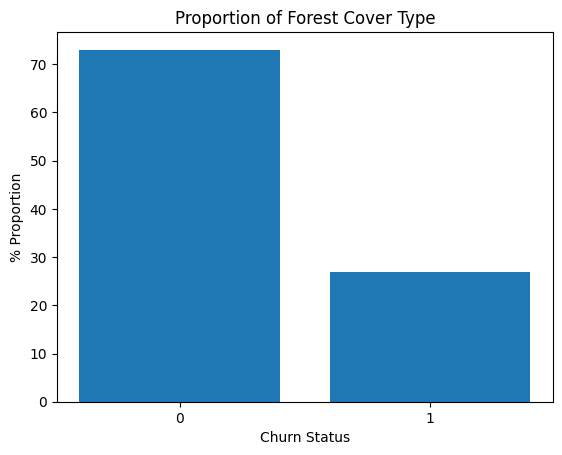

In [7]:
df_churn_prop = pd.DataFrame(df_train.iloc[:,-1].value_counts(normalize=True).multiply(100).round(1)).reset_index()
plt.bar(x = df_churn_prop['label'].astype(str), height = df_churn_prop['proportion'].values, label = '% Proportion')
plt.plot()
plt.xlabel("Churn Status")
plt.ylabel("% Proportion")
plt.title("Proportion of Forest Cover Type")
plt.show()

From the plot above, we see there are imbalances between classes 0 and 1. Class labeled as 1 has significantly less presence than class labeled 0. To deal with this issue, we will test several resampling techniques like upsampling, downsampling, or SMOTE if we have time.

## Feature Encoding
Now, we perform a one-hot encoding on nominal features in X matrix using the sklearn module. The drop_first = 'True' will guard against multicollinearity for our features being encoded.

In [8]:

# gets the indices of the object datatype and not object datatype from df_train_v1, ..v2, ..3
idx_v1 = list(set(df_train.columns.get_indexer(df_train.select_dtypes('object').columns)))
not_idx_v1 = list(set(range(0,df_train.shape[1]-1)).difference(set(idx_v1)))


from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
# multicollinearity guard for the OneHotEncoder

# encoding feature column indices 
ohe = OneHotEncoder(categories='auto', drop='first')
c_transf = ColumnTransformer([
    ('onehot', ohe, idx_v1),
    ('nothing', 'passthrough', not_idx_v1)
])
c_transf.fit(df_train.iloc[:,:-1])


X = c_transf.transform(df_train.iloc[:,:(df_train.shape[1]-1)]) # encoding feature matrix using on
y = df_train['label'].values


## Dealing with imbalance classes

In [9]:
from collections import Counter
from imblearn.over_sampling import SMOTE
print('Original dataset shape %s' % Counter(y))
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 4113, 1: 1521})
Resampled dataset shape Counter({0: 4113, 1: 4113})


## Features Importance

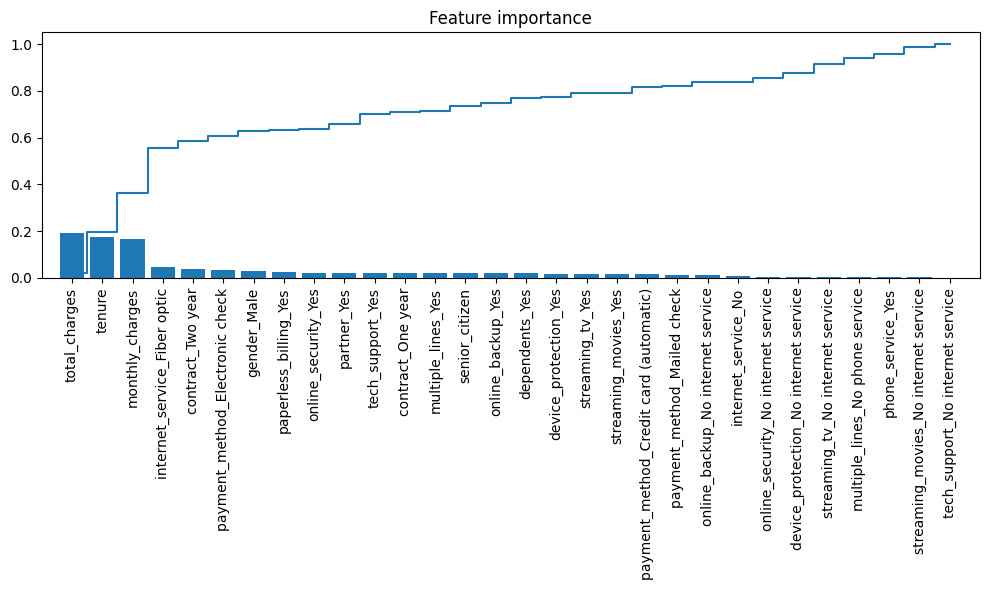

In [10]:
# module for the random forest
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
rf = RandomForestClassifier(n_estimators=20, random_state=1, n_jobs=2)
rf.fit(pd.get_dummies(df_train.drop('label', axis=1), drop_first= True, dtype='int'),
       df_train.label.astype(int))

importances = rf.feature_importances_

indices = np.argsort(importances)[::-1]
feat_labels = pd.get_dummies(df_train.drop('label',axis =1), drop_first=True).columns[:]
# print feature important using text in descending order
# for f in range(X.shape[1]):
#     print("%2d) %-*s %f" % (f + 1, 40, 
#                             feat_labels[indices[f]], 
#                             importances[indices[f]]))


# plot bar graph of the feature importance
plt.figure(figsize=(10,6))
plt.title('Feature importance')
plt.bar(range(X.shape[1]), 
        importances[indices],
        align='center')
plt.step(range(0,X.shape[1]), np.cumsum(importances), where='mid')

plt.xticks(range(X.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

From the output, it looks like total charge, tenure, and monthly charge contribute much of the weight in predicting customer churn using random forest feature selection

## Partitioning Data Into 80% train and 20 %test Set.

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =\
    train_test_split(X_res, y_res, 
                     test_size=0.20, 
                     random_state=0, 
                     stratify=y_res)


## Feature Scaling and Dimensionality Reduction (PCA/LDA)

In [12]:
from sklearn.preprocessing import StandardScaler # module for standardizing the features 
# the scaling function using the z-score transformation and avoid breaking the sparsity structure of the data.
sc = StandardScaler() 

# Fit to train set, then transform train set using z-score transformation
X_train_std = sc.fit_transform(X_train) 
# apply z-score transformation to test set
X_test_std = sc.transform(X_test) 

from sklearn.decomposition import PCA # module for principal component analysis
# apply pca to the standardize train and test set
pca = PCA(n_components = 0.90) 
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# apply linear discriminate analysis
lda = LDA(n_components=1)
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.transform(X_test_std)

### Visualizing PCA components

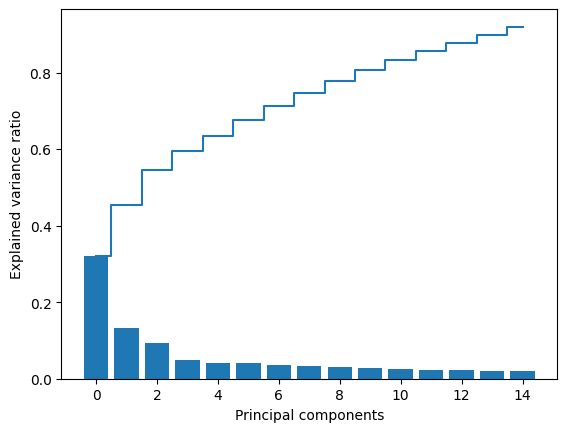

In [13]:
pca.explained_variance_ratio_
plt.bar(range(X_train_pca.shape[1]), pca.explained_variance_ratio_, align='center')
plt.step(range(X_train_pca.shape[1]), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()

# Choosing Performance Metric
The function below request for the string name of a model and the model object to output the performance metrics of precision, recall, f1-score, and accuracy.
<br>
* **Accuracy** — This metric measures the proportion of correct predictions made by the model across the entire dataset. 
* **Precision** — Precision measures the proportion of true positive predictions among all positive predictions made by the model.
* **Recall** — Recall, also known as sensitivity or true positive rate, measures the proportion of true positive predictions among all actual positive instances.
* **F1 Score** — F1 Score is a metric that balances precision and recall. F1 Score is useful when seeking a balance between high precision and high recall, as it penalizes extreme negative values of either component.

In [14]:
# performance metrics
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score 
def make_results(model_name, model_object):
    '''
    Accepts as arguments a model name (your choice - string) and
    Returns a pandas df with the F1, recall, precision, and accuracy scores
    '''
    
    # Extract accuracy, precision, recall, and f1 score
    f1 = f1_score(y_test, y_preds, average = 'micro')
    recall = recall_score(y_test, y_preds, average='micro')
    precision = precision_score(y_test, y_preds, average='micro')
    accuracy = accuracy_score(y_test, y_preds)
    missclassified = [(y_test != y_preds).sum()]
    # Create table of results
    table = pd.DataFrame(
        {'model': [model_name],
         'misclassified examples': missclassified,
        'precision': [precision],
        'recall': [recall],
        'F1 score': [f1],
        'accuracy': [accuracy],
        },
    )
    return table

# Learning Algorithm and Training a Model

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier


#Instantiate LogisticRegression  model
lr = LogisticRegression(C = 1, solver='liblinear', penalty = 'l2', max_iter= 1000) 
lr.fit(X_train_pca, y_train)
# make  predictions
y_preds = lr.predict(X_test_pca)
# append new results to the results dataframe
results = make_results('LogisticRegression with pca', lr).round(2)


#instantiate the model
svm = SVC(kernel='rbf', C=10**1, random_state=1)
svm.fit(X_train_pca, y_train)
#make predictions
y_preds = svm.predict(X_test_pca)
# append new results to the results dataframe
results = pd.concat([make_results('Support Vector Machine pca', svm).round(2), results]) 


# instantiate K-nearest neighbors model
knn = KNeighborsClassifier(n_neighbors=7, p=1, n_jobs = -1)
knn.fit(X_train_pca, y_train)
#make predictions
y_preds = knn.predict(X_test_pca)
results = pd.concat([make_results('K-Nearest-Neighbor with pca', knn).round(2), results]) 

#Instantiate naive bayes  model
gnb = GaussianNB()
gnb.fit(X_train_pca, y_train)
# make  predictions
y_preds = gnb.predict(X_test_pca)
results = pd.concat([make_results('naive bayes with pca', gnb).round(2), results]) 

#Instantiate decision tree classifier model
tree_model = DecisionTreeClassifier(criterion='entropy', 
                                    max_depth=40, 
                                    random_state=1)
tree_model.fit(X_train_pca, y_train)
# make predictions
y_preds = tree_model.predict(X_test_pca)
# append new results to the results dataframe
results = pd.concat([make_results('Decision Tree with pca', tree_model).round(2), results]) 


# Instantiate Random Forest Model
rf = RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state=1, n_jobs=-1, max_depth=42)
rf.fit(X_train_pca, y_train)
# make predictions
y_preds = rf.predict(X_test_pca)
results = pd.concat([make_results('random forest with pca', rf).round(2), results])

### Performance of Learning Algorithms With LDA Technique

In [16]:
#instantiate the model
lr.fit(X_train_lda, y_train)
#make  predictions
y_preds = lr.predict(X_test_lda)
# append new results to the results dataframe
results = pd.concat([make_results('Logistic Regression lda', lr).round(2), results]) 


#instantiate the model
svm = SVC(kernel='rbf', C=10**1, random_state=1)
svm.fit(X_train_lda, y_train)
#make predictions
y_preds = svm.predict(X_test_lda)
# append new results to the results dataframe
results = pd.concat([make_results('Support Vector Machine lda', svm).round(2), results]) 

#instantiate the model
tree_model.fit(X_train_lda, y_train)
#make predictions
y_preds = tree_model.predict(X_test_lda)
# append new results to the results dataframe
results = pd.concat([make_results('Decision Tree lda', tree_model).round(2), results]) 


#instantiate the model
rf.fit(X_train_lda, y_train)
#make predictions
y_preds = rf.predict(X_test_lda)
results = pd.concat([make_results('Random Forest lda', rf).round(2), results]) 


#instantiate the model
knn.fit(X_train_lda, y_train)
#make predictions
y_preds = knn.predict(X_test_lda)
results = pd.concat([make_results('K-Nearest-Neighbor lda', knn).round(2), results]) 



#Instantiate naive bayes  model
gnb = GaussianNB()
gnb.fit(X_train_lda, y_train)
# make  predictions
y_preds = gnb.predict(X_test_lda)
results = pd.concat([make_results('naive bayes with lda', gnb).round(2), results]) 

### Peformance of Learning Algorithms Without Any Dimensionality Reduction.

In [17]:
#instantiate the model
lr.fit(X_train_std, y_train)
#make  predictions
y_preds = lr.predict(X_test_std)
# append new results to the results dataframe
results = pd.concat([make_results('LogisticRegression', lr).round(2), results]) 


#instantiate the model
svm = SVC(kernel='rbf', C=10**1, random_state=1)
svm.fit(X_train_std, y_train)
#make predictions
y_preds = svm.predict(X_test_std)
# append new results to the results dataframe
results = pd.concat([make_results('Support Vector Machine', svm).round(2), results]) 

#instantiate the model
tree_model.fit(X_train_std, y_train)
#make predictions
y_preds = tree_model.predict(X_test_std)
# append new results to the results dataframe
results = pd.concat([make_results('Decision Tree', tree_model).round(2), results]) 


#instantiate the model
rf.fit(X_train_std, y_train)
#make predictions
y_preds = rf.predict(X_test_std)
results = pd.concat([make_results('Random Forest', rf).round(2), results]) 


#instantiate the model
knn.fit(X_train_std, y_train)
#make predictions
y_preds = knn.predict(X_test_std)
results = pd.concat([make_results('K-Nearest-Neighbor', knn).round(2), results]) 


#Instantiate naive bayes  model
gnb.fit(X_train_std, y_train)
# make  predictions
y_preds = gnb.predict(X_test_std)
results = pd.concat([make_results('naive bayes', gnb).round(2), results]) 
results.sort_values(by = 'accuracy', ascending =False)

,model,misclassified examples,precision,recall,F1 score,accuracy
0,Random Forest,229,0.86,0.86,0.86,0.86
0,Support Vector Machine,274,0.83,0.83,0.83,0.83
0,random forest with pca,272,0.83,0.83,0.83,0.83
0,Support Vector Machine pca,298,0.82,0.82,0.82,0.82
0,Decision Tree,311,0.81,0.81,0.81,0.81
0,K-Nearest-Neighbor,315,0.81,0.81,0.81,0.81
0,K-Nearest-Neighbor with pca,349,0.79,0.79,0.79,0.79
0,naive bayes with pca,370,0.78,0.78,0.78,0.78
0,LogisticRegression,381,0.77,0.77,0.77,0.77
0,Decision Tree with pca,379,0.77,0.77,0.77,0.77


From the results of the learning algorithm with default hyperparameter resulted in Random Forest, Support Vector Machine with lda, and decision tree for the highest performers in predicting the correct labels. We will dedicate the remaining time to create a random **forest/svm/logistic regression** pipeline.

## Data transformation and estimator pipeline

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

pipe_knn =make_pipeline(StandardScaler(),
                        KNeighborsClassifier())
param_range_knn = [1,2,3,4,5]
param_grid_knn = [{'kneighborsclassifier__n_neighbors':param_range_knn,
                  'kneighborsclassifier__p': [1,2,3,4]}]

#logistics regression pipeline search
pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression())
param_range_lr = [0.0001, 0.001, 0.01, 0.1, 1, 10,]
param_grid_lr = [{'logisticregression__C':param_range_lr,
                  'logisticregression__penalty':['l1', 'l2', 'elasticnet', None],
                  'logisticregression__max_iter': [100]}]

# random forest pipeline search
pipe_rf = make_pipeline(RandomForestClassifier(random_state=1))
param_range_rf  = [5, 10, 15, 20]
param_grid_rf  = [{'randomforestclassifier__max_depth': param_range_rf,
                   'randomforestclassifier__criterion': ['gini','entropy','log_loss'],
                   'randomforestclassifier__n_estimators': [50, 100, 200],
                   }]

# support vector machine pipeline search
pipe_svc = make_pipeline(StandardScaler(),
                         PCA(n_components= 0.90),
                         SVC(random_state=1,))
param_range_svc = [10, 20, 30]
param_grid_svc = [{'svc__C': param_range_svc, 
               'svc__kernel': ['linear']},
              {'svc__C': param_range_svc, 
               'svc__gamma': param_range_svc, 
               'svc__kernel': ['rbf']}]

We have initiated our logistic regression, support vector classifier, random forest pipeline to check through different hyperparameter setting in order to find the best parametersetting and fit it to the model choosen.

## Debugging algorithms with learning curves

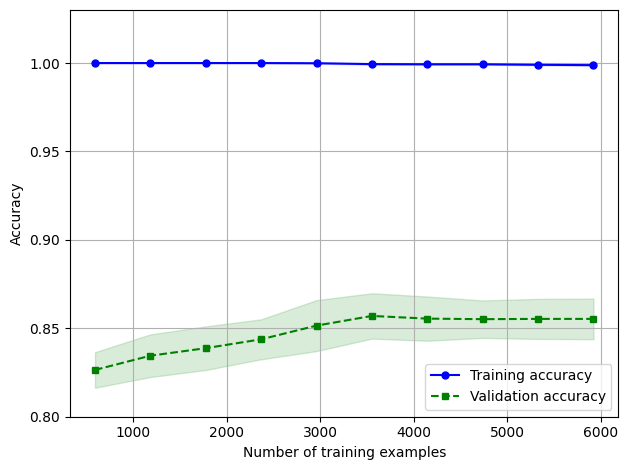

In [19]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


# pipe_lr = make_pipeline(StandardScaler(),
#                         LogisticRegression(penalty='l2', max_iter=10000))

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_rf,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
# plt.savefig('figures/06_05.png', dpi=300)
plt.show()

the random forest does a poor job with the bias-variance trade-off

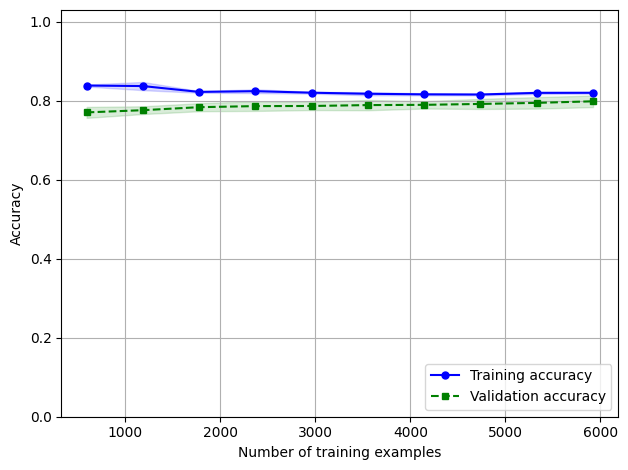

In [20]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_svc,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.0, 1.03])
plt.tight_layout()
# plt.savefig('figures/06_05.png', dpi=300)
plt.show()

the SVC classifier does a great job with the bias-variance trade-off

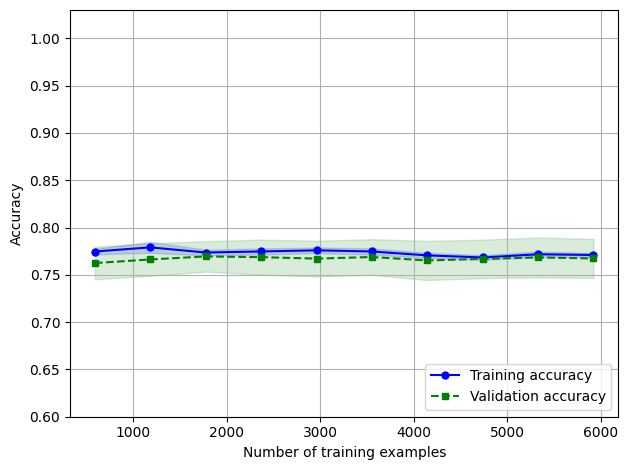

In [21]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_lr,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.6, 1.03])
plt.tight_layout()
# plt.savefig('figures/06_05.png', dpi=300)
plt.show()

the logistics regerssion classifier does a great job with the bias-variance trade-off

## Addressing over- and underfitting with validation curves

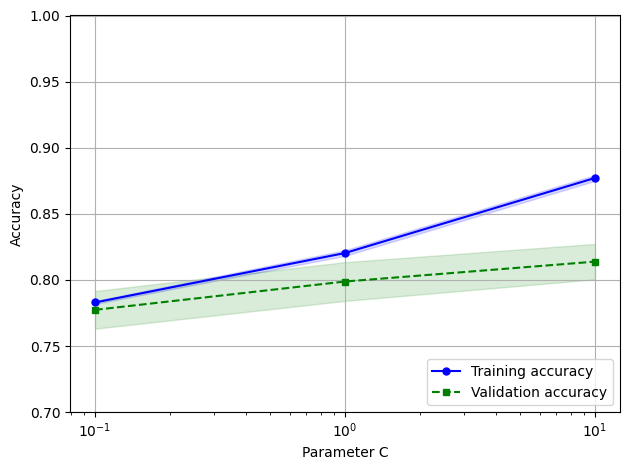

In [22]:
from sklearn.model_selection import validation_curve

param_range = [0.1, 1.0, 10.0]
train_scores, test_scores = validation_curve(
                estimator=pipe_svc, 
                X=X_train, 
                y=y_train, 
                param_name='svc__C', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='Validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.7, 1.0])
plt.tight_layout()
# plt.savefig('figures/06_06.png', dpi=300)
plt.show()

The support vector classifier veer off the track with increasing C

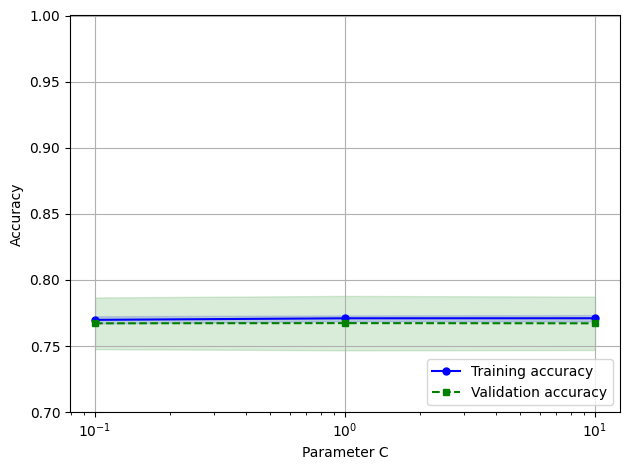

In [23]:
from sklearn.model_selection import validation_curve

param_range = [0.1, 1.0, 10.0]
train_scores, test_scores = validation_curve(
                estimator=pipe_lr, 
                X=X_train, 
                y=y_train, 
                param_name='logisticregression__C', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='Validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.7, 1.0])
plt.tight_layout()
# plt.savefig('figures/06_06.png', dpi=300)
plt.show()

The logistics regression classifier does well with varying C hyperparameter

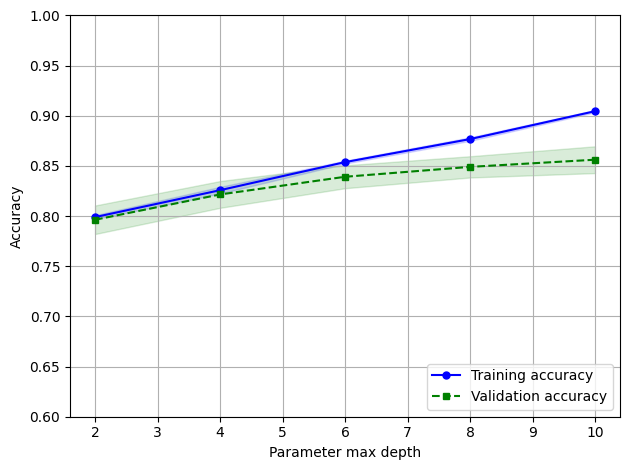

In [24]:
from sklearn.model_selection import validation_curve


param_range = [2,4,6,8,10]
train_scores, test_scores = validation_curve(
                estimator=pipe_rf, 
                X=X_train, 
                y=y_train, 
                param_name='randomforestclassifier__max_depth', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='Validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
# plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter max depth')
plt.ylabel('Accuracy')
plt.ylim([0.6, 1.0])
plt.tight_layout()
# plt.savefig('figures/06_06.png', dpi=300)
plt.show()

The random forest does poorly with varying max depth parameter. Thus, increasing the depth causes it to overfit.

### GridsearchCV Method

#### random forest grid seaarch

In [25]:
# performing 13 fold cross validation using random forest model
gs = GridSearchCV(estimator=pipe_rf, 
                  param_grid=param_grid_rf, 
                  scoring='accuracy', 
                  refit=True,
                  cv=13,
                  n_jobs=-1, 
                  verbose=2)
gs = gs.fit(X_train, y_train)
y_preds = gs.predict(X_test)
print(make_results('random forest 13-k fold cv', gs).round(3))
gs.best_params_

Fitting 13 folds for each of 36 candidates, totalling 468 fits
                        model  misclassified examples  precision  recall  \
0  random forest 13-k fold cv                     227      0.862   0.862   

   F1 score  accuracy  
0     0.862     0.862  


{'randomforestclassifier__criterion': 'gini',
 'randomforestclassifier__max_depth': 15,
 'randomforestclassifier__n_estimators': 200}

#### SVM grid seaarch

In [26]:
# performing 13 fold cross validation using random forest model
gs = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid_svc, 
                  scoring='accuracy', 
                  refit=True,
                  cv=13,
                  n_jobs=-1, 
                  verbose=2)
gs = gs.fit(X_train, y_train)
y_preds = gs.predict(X_test)
print(make_results('support vector machine 13-k fold cv', gs).round(3))
gs.best_params_

Fitting 13 folds for each of 12 candidates, totalling 156 fits
                                 model  misclassified examples  precision  \
0  support vector machine 13-k fold cv                     381      0.769   

   recall  F1 score  accuracy  
0   0.769     0.769     0.769  


{'svc__C': 20, 'svc__kernel': 'linear'}

#### Logistic regression with 13k-fold Cross Validation

In [27]:
# performing 13 fold cross validation using random forest model
gs = GridSearchCV(estimator=pipe_lr, 
                  param_grid=param_grid_lr, 
                  scoring='accuracy', 
                  refit=True,
                  cv=13,
                  n_jobs=-1, 
                  verbose=2)
gs = gs.fit(X_train, y_train)
y_preds = gs.predict(X_test)
print(make_results('logistic regression 13-k fold cv', gs).round(3))
gs.best_params_

Fitting 13 folds for each of 24 candidates, totalling 312 fits
                              model  misclassified examples  precision  \
0  logistic regression 13-k fold cv                     379       0.77   

   recall  F1 score  accuracy  
0    0.77      0.77      0.77  


{'logisticregression__C': 0.0001,
 'logisticregression__max_iter': 100,
 'logisticregression__penalty': None}

## Confusion matrix

[[602 221]
 [158 665]]


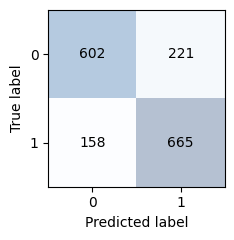

In [28]:
from sklearn.metrics import confusion_matrix


confmat = confusion_matrix(y_true=y_test, y_pred=y_preds)
print(confmat)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
ax.xaxis.set_ticks_position('bottom')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('figures/06_09.png', dpi=300)
plt.show()

The Confusion matrix has 
602 true positive, 
158 false positive,
221 false negative,
and 665 true negative

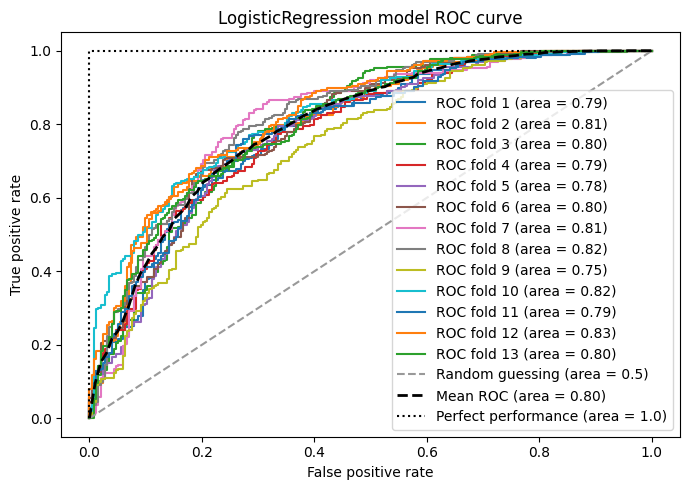

In [29]:
from sklearn.metrics import roc_curve, auc
from numpy import interp
from sklearn.model_selection import StratifiedKFold


pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(penalty='l2', 
                                           random_state=1,
                                           solver='lbfgs',
                                           C=100.0))
  

cv = list(StratifiedKFold(n_splits=13).split(X_train, y_train))

fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(X_train[train],
                         y_train[train]).predict_proba(X_train[test])

    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label=f'ROC fold {i+1} (area = {roc_auc:.2f})')

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing (area = 0.5)')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label=f'Mean ROC (area = {mean_auc:.2f})', lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance (area = 1.0)')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')
plt.title('LogisticRegression model ROC curve')
plt.tight_layout()
# plt.savefig('figures/06_10.png', dpi=300)
plt.show()

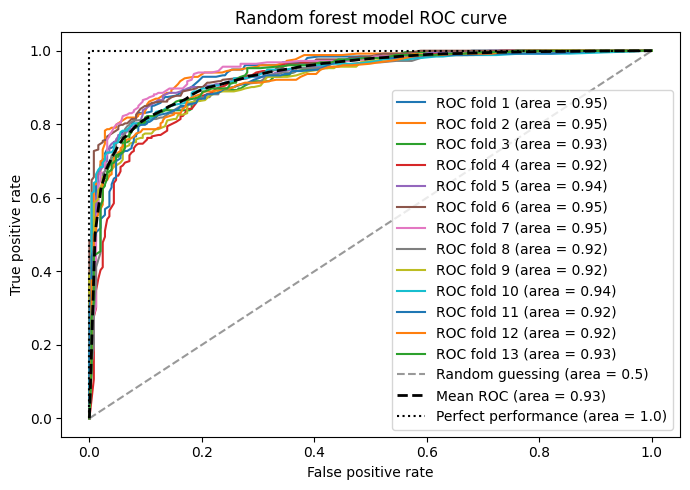

In [30]:
from sklearn.metrics import roc_curve, auc
from numpy import interp
from sklearn.model_selection import StratifiedKFold



cv = list(StratifiedKFold(n_splits=13).split(X_train, y_train))

fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_rf.fit(X_train[train],
                         y_train[train]).predict_proba(X_train[test])

    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label=f'ROC fold {i+1} (area = {roc_auc:.2f})')

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing (area = 0.5)')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label=f'Mean ROC (area = {mean_auc:.2f})', lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance (area = 1.0)')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')
plt.title('Random forest model ROC curve')

plt.tight_layout()
# plt.savefig('figures/06_10.png', dpi=300)
plt.show()

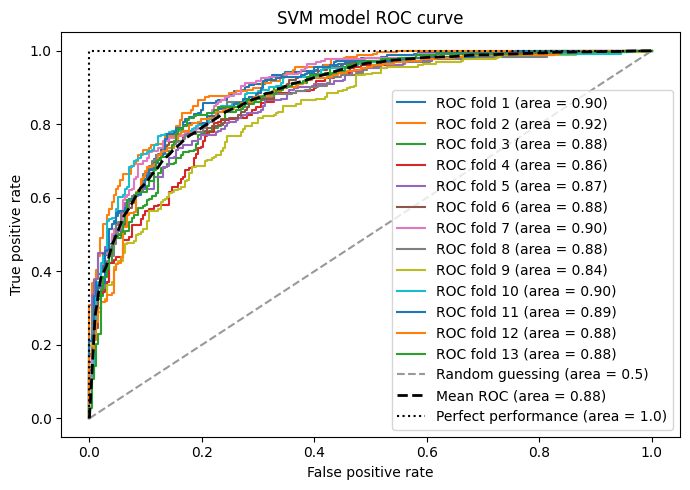

In [31]:
from sklearn.metrics import roc_curve, auc
from numpy import interp
from sklearn.model_selection import StratifiedKFold



cv = list(StratifiedKFold(n_splits=13).split(X_train, y_train))

fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_svc.fit(X_train[train],
                         y_train[train]).decision_function(X_train[test])

    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label=f'ROC fold {i+1} (area = {roc_auc:.2f})')

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing (area = 0.5)')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label=f'Mean ROC (area = {mean_auc:.2f})', lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance (area = 1.0)')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')
plt.title('SVM model ROC curve')

plt.tight_layout()
# plt.savefig('figures/06_10.png', dpi=300)
plt.show()

Although, the random forest and svm had better scoring on the roc-auc curve, the logistic regression performed better on unseen data. Thus, we decided to proceed with logistic regression as our final model.

# Read and Transform Test dataset for predicting labels

In [32]:
#read test file
df_test = pd.read_csv('test.csv')
df_test['total_charges'] = df_test['total_charges'].replace(' ', 0).astype(float)
# reserve id column for the submission file
id = df_test['id'].values
df_test = df_test.drop(['id'], axis = 1)

In [33]:
test_X = c_transf.transform(df_test) # encoding feature matrix using dummy variable

In [34]:
# make predictions using the random forest model with cv
y_pred_test = gs.predict(test_X)
submission = pd.DataFrame({'id':id, 'label':y_pred_test})  # converting id, and labels into dataframe
submission.to_csv('submission.csv', index=False) # output the results of our prediction in a csv file format.

# Summary

We investigated the customer churn dataset by inspecting the dataset, checked for missing/inconsistent/irrelevant data. We found that the proportion of classes are not equal, class= 0 took the majority of the observation. We decided to keep all the features. This imbalance encourage us to up sample the minority class.  We also had to encode many categorical variables to nominal data type. After the EDA, we split the data into 80% train and 20% test set using the train dataset. We investigated many ML algorithm such as the logistic regression, decision tree, random forest, knn, and naive's bayes. We investigated some dimensionality reduction techniques to our high dimensional dataframe and compared the results of just scaled, pca, and lda method. We found that the model without dimensionality reduction using logistic regression was the best performer. Once I determined my model selection after running several different ML algorithm, I decided to fully dedicate my time to logistic regression and random forest and support vector machine for hyperparameter tunning with kfold cross validation. The logistic regression with 13 kfold cross performed the best and was ultimately decided as my final model to make the prediction because of its ability to capture unseen data patterns. This conclusion was based by the overperformance of obtaining the higher test accuracy score to unseen data in the kaggle competition.